# Imports

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Read CSVs

In [32]:
income = pd.read_csv("Cleaned Data/Median_Income.csv")
vacc = pd.read_csv("Cleaned Data/Vaccination_Rates.csv")

print(income.columns)
print(vacc.columns)

Index(['NEIGHBORHOOD', 'MEDIAN INCOME', 'POPULATION PER SQMI', 'income level'], dtype='object')
Index(['CITY_TYPE', 'CITY', 'COMMUNITY', 'LABEL', 'City_Community', 'Cases',
       'Case_Rate', 'Deaths', 'Death_Rate', 'Percent_of_People_with_1__Dose',
       'Percent_of_People_Fully_Vaccinated'],
      dtype='object')


# Rename Columns

In [33]:
income = income.rename(columns={'NEIGHBORHOOD':'Neighborhood', 'MEDIAN INCOME':'Median Income', 'POPULATION PER SQMI':'Population Per SQMI', 'income level':'Income Level'})
vacc = vacc.rename(columns={"Death_Rate":"Death Rate", "Case_Rate":"Case Rate", "Percent_of_People_Fully_Vaccinated":"Percent of People Fully Vaccinated"})
print(income.columns)
print(vacc.columns)

Index(['Neighborhood', 'Median Income', 'Population Per SQMI', 'Income Level'], dtype='object')
Index(['CITY_TYPE', 'CITY', 'COMMUNITY', 'LABEL', 'City_Community', 'Cases',
       'Case Rate', 'Deaths', 'Death Rate', 'Percent_of_People_with_1__Dose',
       'Percent of People Fully Vaccinated'],
      dtype='object')


# Scatter Plot Function

In [84]:
def makeScatter(x_df, y_df, x_col, y_col):
    # fix 0 or inf values
    x_df = x_df.replace([np.inf, -np.inf, np.nan], 0)
    y_df = y_df.replace([np.inf, -np.inf, np.nan], 0)
    
    # set x and y lists
    x = x_df[x_col]
    y = y_df[y_col]
    
    # linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.plot(x, slope * y + intercept, color='red', label='Linear Regression')
    
    # scatter plt
    plt.scatter(x, y, alpha=0.5, edgecolor='black')
    
    # label plt
    plt.title(x_col + " vs " + y_col)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    
    # show plt
    plt.show()
    
    # corelation and P-Value
    print(f"linear regression line: y = {slope:.2f}x + {intercept:.2f}")
    print('Correlation coefficient (r):', r_value)
    print('p-value:', p_value)

# Median Income vs Death Rate

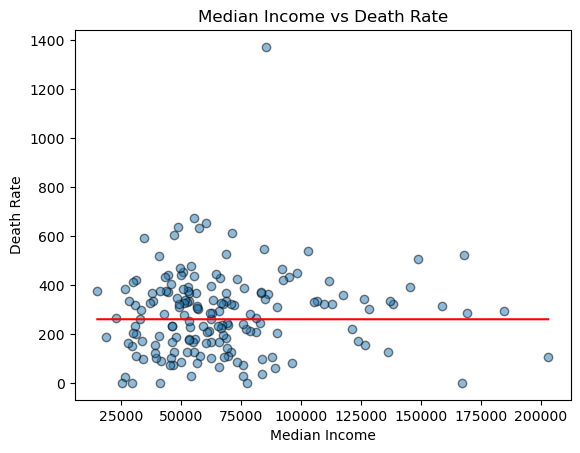

linear regression line: y = 0.00x + 260.07
Correlation coefficient (r): 0.06566873898043955
p-value: 0.3906701252317265


In [85]:
makeScatter(income, vacc, "Median Income", "Death Rate")

# Death Rate - Population Per SQMI

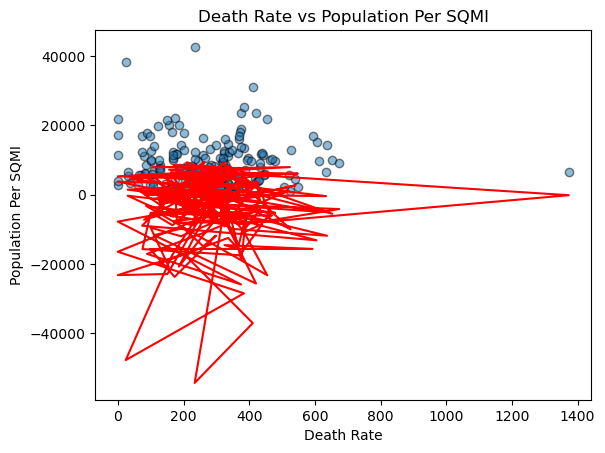

linear regression line: y = -1.50x + 9529.73
Correlation coefficient (r): -0.03703818271740685
p-value: 0.6285309513147301


In [86]:
makeScatter(vacc, income, "Death Rate", "Population Per SQMI")

# Death Rate - Percent of People Fully Vaccinated

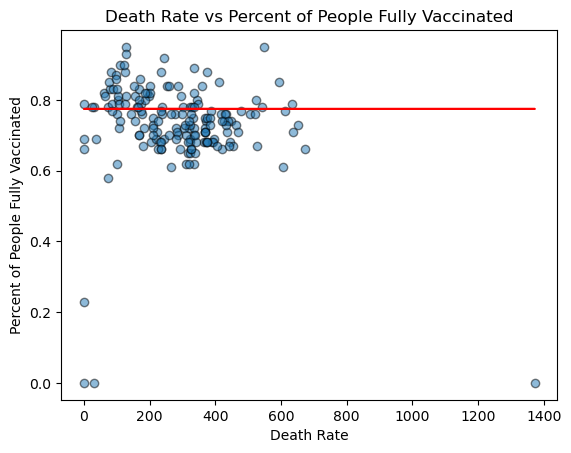

linear regression line: y = -0.00x + 0.77
Correlation coefficient (r): -0.19071376391546443
p-value: 0.011958207603335361


In [87]:
makeScatter(vacc, vacc, "Death Rate", "Percent of People Fully Vaccinated")

# Case Rate - Median Income

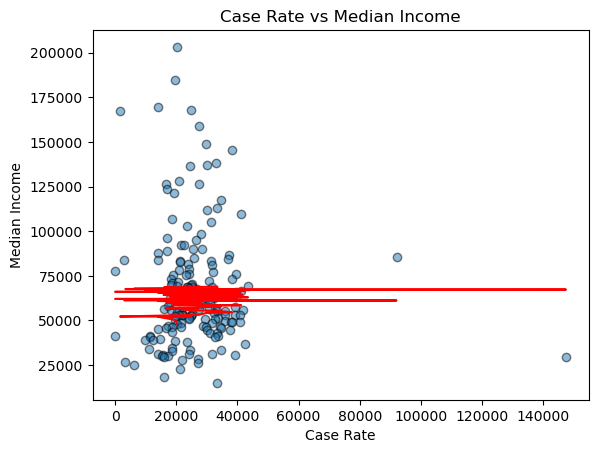

linear regression line: y = -0.11x + 70520.56
Correlation coefficient (r): -0.04470946279226572
p-value: 0.5591596492939632


In [88]:
makeScatter(vacc, income, "Case Rate", "Median Income")